## ${\textbf{Import Libraries}}$

In [94]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import itertools
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode , iplot , plot
init_notebook_mode(connected = True)
import cufflinks as cf
cf.go_offline()
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import classification_report , accuracy_score , roc_auc_score
from sklearn import (metrics,preprocessing)
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 10, 8
sns.set_style('whitegrid')

# Tasks

## 1.Introduction
This assignment will help you to consolidate the concepts learnt in the
session.


## 2.Problem Statement
Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or
not.
Loading Data and modules


Url=
https://raw.githubusercontent.com/BigDataGal/Python-for-DataScience/master/titanic-train.csv
titanic = pd.read_csv(url)
titanic.columns =
['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ti
cket','Fare','Cabin','E mbarked']
You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare to predict whether a passenger
survived.
NOTE:ThesolutionsharedthroughGithubshouldcontainthesource
codeusedand thescreenshotoftheoutput.
 
 
## 3. Output
This assignment consists of 200 marks and has to be submitted in
.ipynb/PDF format in the upcoming session for evaluation.

## ${\textbf{Import Data}}$

In [144]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

In [182]:
titanic = pd.read_csv(url)

In [23]:
len(titanic.columns)

12

##  <a id='7'>Select Specific columns as tasked<a/>

In [83]:
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'] 

In [183]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
print('Titanic Data - rows:' , titanic.shape[0],'columns:', titanic.shape[1])

Titanic Data - rows: 891 columns: 12


##  <a id='7'>Checking Missing Data<a/>

In [33]:
missingInfo = list(titanic.columns[titanic.isnull().any()])
missingInfo

['Age', 'Cabin', 'E mbarked']


##  <a id='7'>Showing number of missing values in each column<a/>

In [34]:
for col in missingInfo:
    missingNumber = titanic[titanic[col].isnull() == True].shape[0]
    print('Missing Number for Col {}: {}'.format(col , missingNumber))
    

Missing Number for Col Age: 177
Missing Number for Col Cabin: 687
Missing Number for Col E mbarked: 2


##  <a id='7'>Percentage of missing values in dataframe<a/>

In [45]:
for col in missingInfo:
    percentMissing = titanic[titanic[col].isnull() == True].shape[0] / titanic.shape[0]
    print('Col Percent Missing {}: {}'.format(col, percentMissing))
    

Col Percent Missing Age: 0.19865319865319866
Col Percent Missing Cabin: 0.7710437710437711
Col Percent Missing E mbarked: 0.002244668911335578


## <a id='7'>Columns and missing values<a/>

In [30]:
total = titanic.isnull().sum().sort_values(ascending = False)
percent = (titanic.isnull().sum()/titanic.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,687.000000,177.00000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,77.104377,19.86532,0.224467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Observation:

Cabin column has 77% of its data missing.

Age has 19% of its data missing.

Embarked column has 22% of its data missing.

In [150]:
# Checking for duplicates in columns . There is a sum of 167 duplicates
titanic.duplicated(keep=False).sum()

167

In [151]:
# Checking exactly where the duplicate values are in the df
titanic[titanic.duplicated(keep=False)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
4,0,3,1,35.0,0,0,8.0500,S
26,0,3,1,NaN,0,0,7.2250,C
28,1,3,0,NaN,0,0,7.8792,Q
29,0,3,1,NaN,0,0,7.8958,S
32,1,3,0,NaN,0,0,7.7500,Q
...,...,...,...,...,...,...,...,...
870,0,3,1,26.0,0,0,7.8958,S
877,0,3,1,19.0,0,0,7.8958,S
878,0,3,1,NaN,0,0,7.8958,S
884,0,3,1,25.0,0,0,7.0500,S


In [153]:
# Dropping duplicates in our dataframe
# titanic.drop_duplicates(inplace = True)

# Cleaning Our data before analyis

In [84]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Dropping columns

In [85]:
titanic.drop(columns = {'PassengerId','Name' , 'Ticket','Cabin'} , inplace=True)


In [97]:
#checking results
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [57]:
titanic.Sex.unique()

array(['male', 'female'], dtype=object)

## Lets Visualize Male and Female onboard the ship

In [146]:
#labels
lab = titanic["Sex"].value_counts().keys().tolist()
#values
val = titanic["Sex"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'red'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Gender distribution in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

# Male and Female who emabarked the titanic

![](image2.png)

In [181]:
tit = titanic[:] 

In [185]:
# titanic = tit.copy()

In [ ]:
# EDA with Visaualizations

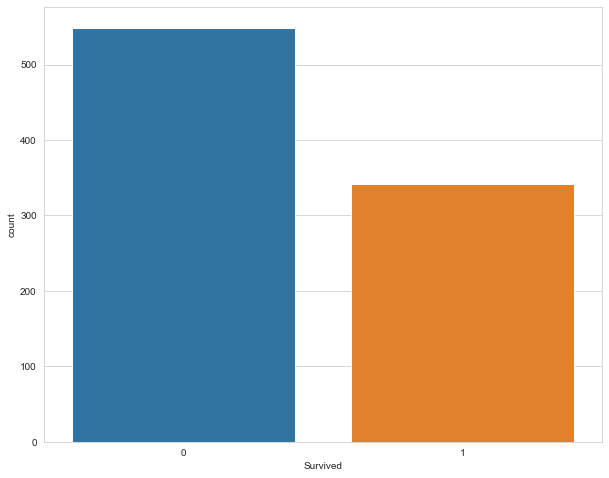

In [114]:
sns.countplot(x = 'Survived' , data = titanic)
plt.show()

# Percentage of Survivors

In [184]:
#labels
lab = titanic["Survived"].value_counts().keys().tolist()
#values
val = titanic["Survived"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'red' ,'royalblue'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Percentage of Survivors in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

# Percentage of Survivors

![](image3.png)

### Total number of people in each class

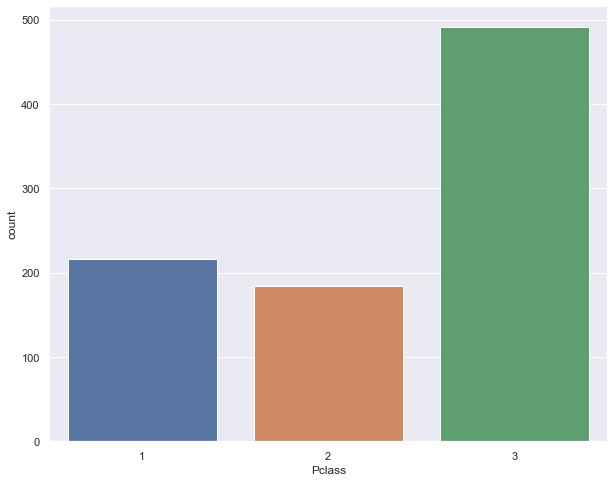

In [125]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Pclass", data=titanic)

# Which gender had the most survivors

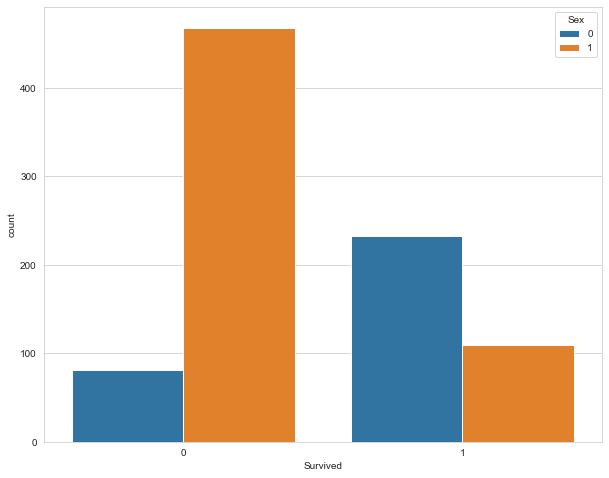

In [118]:
sns.countplot(x='Survived' , hue = 'Sex' , data = titanic)
plt.show()

# What Passenger class had the most survivors

In [119]:
titanic['Pclass'].unique()

array([3, 1, 2])

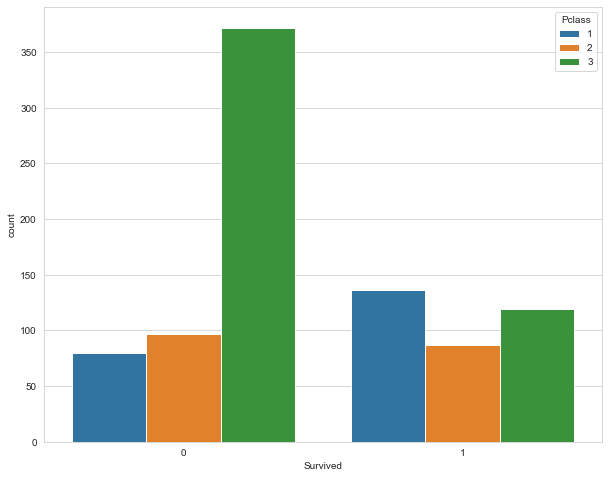

In [121]:
sns.countplot(x='Survived' , hue='Pclass', data=titanic)
plt.show()

### Observations : People from 3rd class died the most. 

# Lets explore more and check on the survival rate in the Embarked column

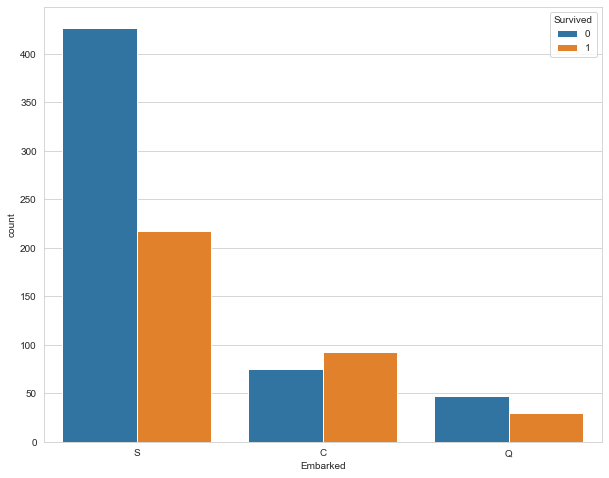

In [122]:
sns.countplot(x='Embarked' , data = titanic , hue = 'Survived')
plt.show()

# Observation :
- Majority of survivors also embarked from Southampton . It also had the 
  highest rate of non survivors.

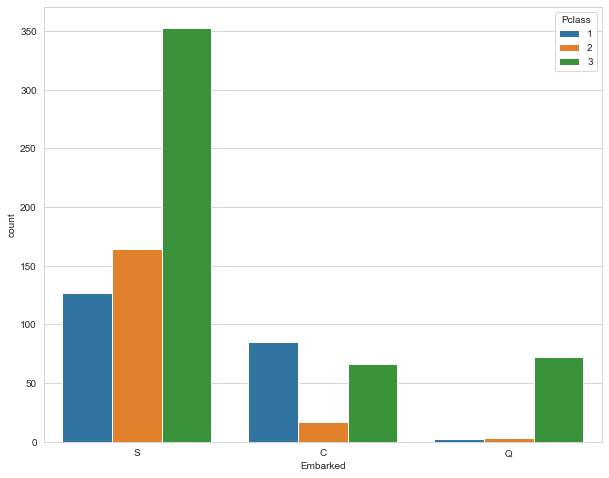

In [123]:
sns.countplot(x='Embarked' , data = titanic , hue='Pclass')
plt.show()

### Observation :

 - Majority of people embarked from Southampton.Thus ,the busiest port    upon embarking and majority of them were in 3rd class as well as all the other classes respectively.

# Exploring the parents with children column

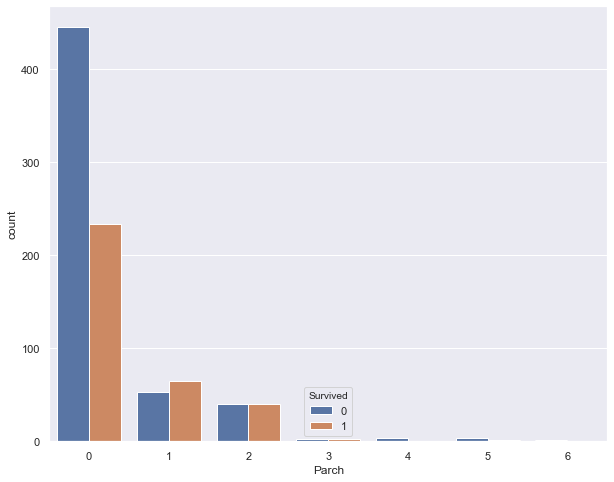

In [126]:
sns.countplot(x='Parch' , data = titanic , hue = 'Survived' , )
plt.show()

# Age distribution onboard

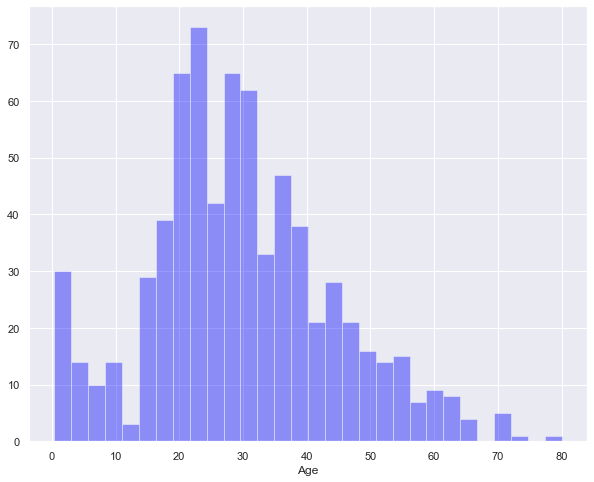

In [134]:
sns.distplot(titanic['Age'].dropna() , kde=False , color='blue' , bins = 30)
plt.show()

# Passenger Age distribution in each class

In [140]:
titanic[['Pclass' , 'Age']].groupby('Pclass').mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


# Plotting the age distribution for each class and observe outliers

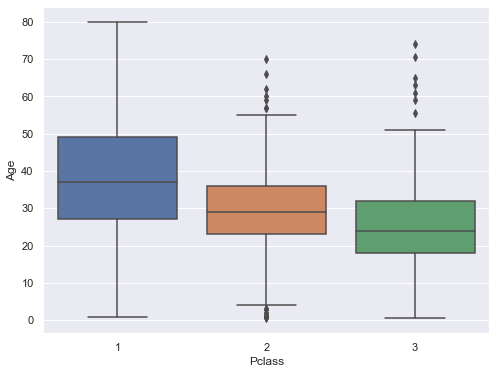

In [139]:
plt.figure(figsize = (8,6))
sns.boxplot(x='Pclass' , y = 'Age' , data = titanic)
plt.show()

- Note since the Age column has quite a large number of missing values,
  it is not appropriate to simply drop the columns . Hence , i decided to 
  create a function to impute the values for the age distribution.

In [172]:
def impute_age(age_pclass):
    Age = age_pclass[0]
    pclass = age_pclass[1]
    if pd.isnull(Age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 30
        else : 
            return 25
    else:
        return Age

In [173]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age , axis= 1)

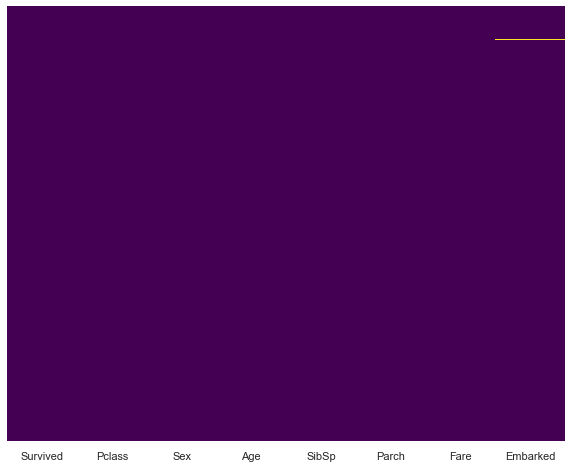

In [174]:
# Checking data to see if there are still missing values
sns.heatmap(titanic.isnull() , yticklabels=False , cbar = False 
            , cmap = 'viridis')
plt.show()

##### Note : Age columns is clean now. Embarked still has a few missing values.

### Dealing with categorical columns

### Function to Convert Sex column from categical to numerical

In [105]:
def map_sex(column):
    mapped = []
    for value in column: 
        if value == 'male' :
            mapped.append(1)
        else :
            mapped.append(0)
    return mapped 

In [106]:
new_col = map_sex(titanic['Sex'])

In [108]:
titanic['Sex'] = new_col

In [178]:
# Check result - Note Male has been replace with 1 and 0 for female
titanic['Sex'].unique()

array([1, 0])

In [ ]:
# Note the above function could be written with a simple lambda function
# Do not run this column since i have already converted it.Just explaining.
titanic['Sex'] = titanic.map(lambda x : 1 if x == 'Male' else(0))

# Dealing with Embarked column - also a categical column

In [75]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'E mbarked'],
      dtype='object')

In [175]:
titanic.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
# note : since Embarked column has only a very small amount of null values
#        I will simply drop them all since it wont affect our model.

In [88]:
titanic[titanic.Embarked.isna()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,female,38.0,0,0,80.0,NaN
829,830,1,1,female,62.0,0,0,80.0,NaN


In [176]:
titanic['Embarked'].dropna(inplace = True)

In [177]:
# checking result
titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [110]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


# Creating dummy variables for Embarked column

In [186]:
embark = pd.get_dummies(titanic['Embarked'] , drop_first = True)

In [187]:
embark.head(3)

,Q,S
0,0,1
1,0,0
2,0,1


# Concatnating embarked column to Dataframe

In [189]:
titanic = pd.concat([titanic , embark] , 1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Q,S
0,0,3,1,22.0,1,0,7.2500,S,0,1
1,1,1,0,38.0,1,0,71.2833,C,0,0
2,1,3,0,26.0,0,0,7.9250,S,0,1
3,1,1,0,35.0,1,0,53.1000,S,0,1
4,0,3,1,35.0,0,0,8.0500,S,0,1


# Dropping the original embarked column from the Dataframe

In [190]:
titanic.drop('Embarked' , 1 , inplace=True)

# Checking for the distribution of dataframe before performing further analysis

In [197]:
df = titanic[:]

<Figure size 720x576 with 0 Axes>

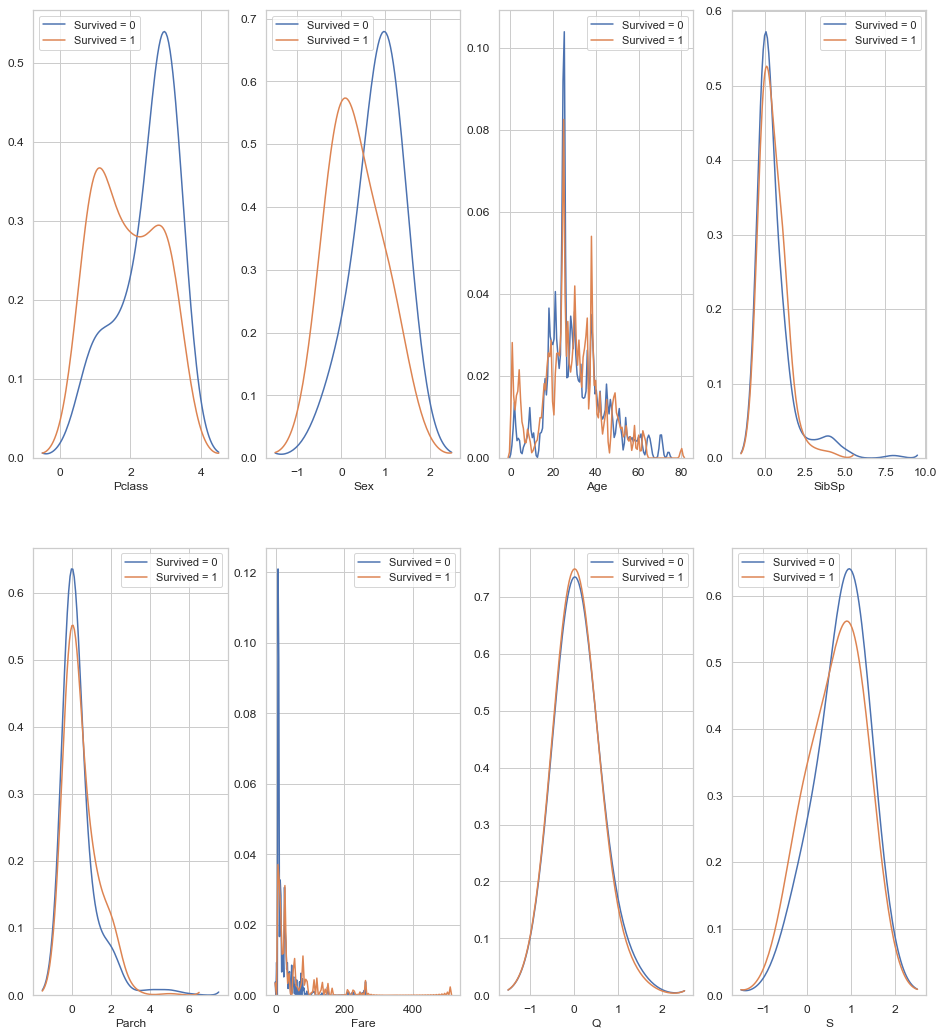

In [202]:
# var = df.columns.values
var = [f for f in df.columns if f not in ['Survived']]


i = 0
t0 = df.loc[df['Survived'] == 0]
t1 = df.loc[df['Survived'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(2,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(3,4,i)
    sns.kdeplot(t0[feature], bw=0.5, label='Survived = 0')
    sns.kdeplot(t1[feature], bw=0.5, label='Survived = 1')
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both' , which='major', labelsize=12)
plt.show()


In [196]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


# Scaling our dataframe

In [206]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,1,0
887,1,1,0,19.0,0,0,30.0000,0,1
888,0,3,0,25.0,1,2,23.4500,0,1
889,1,1,1,26.0,0,0,30.0000,0,0


# Splitting our data

In [207]:
X = titanic.drop(['Survived'] , 1)
y = titanic['Survived']

In [209]:
X_train , x_test , y_train , y_test = train_test_split(X,y, test_size=0.3 , random_state=42)

In [211]:
from sklearn.tree import DecisionTreeClassifier

In [212]:
dtree = DecisionTreeClassifier()

In [213]:
dtree.fit(X_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [214]:
pred = dtree.predict(x_test)

In [215]:
from sklearn.metrics import classification_report , confusion_matrix

In [216]:
print(classification_report(y_test , pred))
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       139
           1       0.65      0.65      0.65        95

    accuracy                           0.71       234
   macro avg       0.70      0.70      0.70       234
weighted avg       0.71      0.71      0.71       234

<function confusion_matrix at 0x1a19340268>
